# LHII Analysis

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import json
import glob 
import mdtraj
import itertools

import matplotlib
font = {'size'   : 22}

import analysis

matplotlib.rc('font', **font)

(10000, 351)
first, last
-0.94882965
-0.94882965

 second, second last
-0.973075
-0.973075


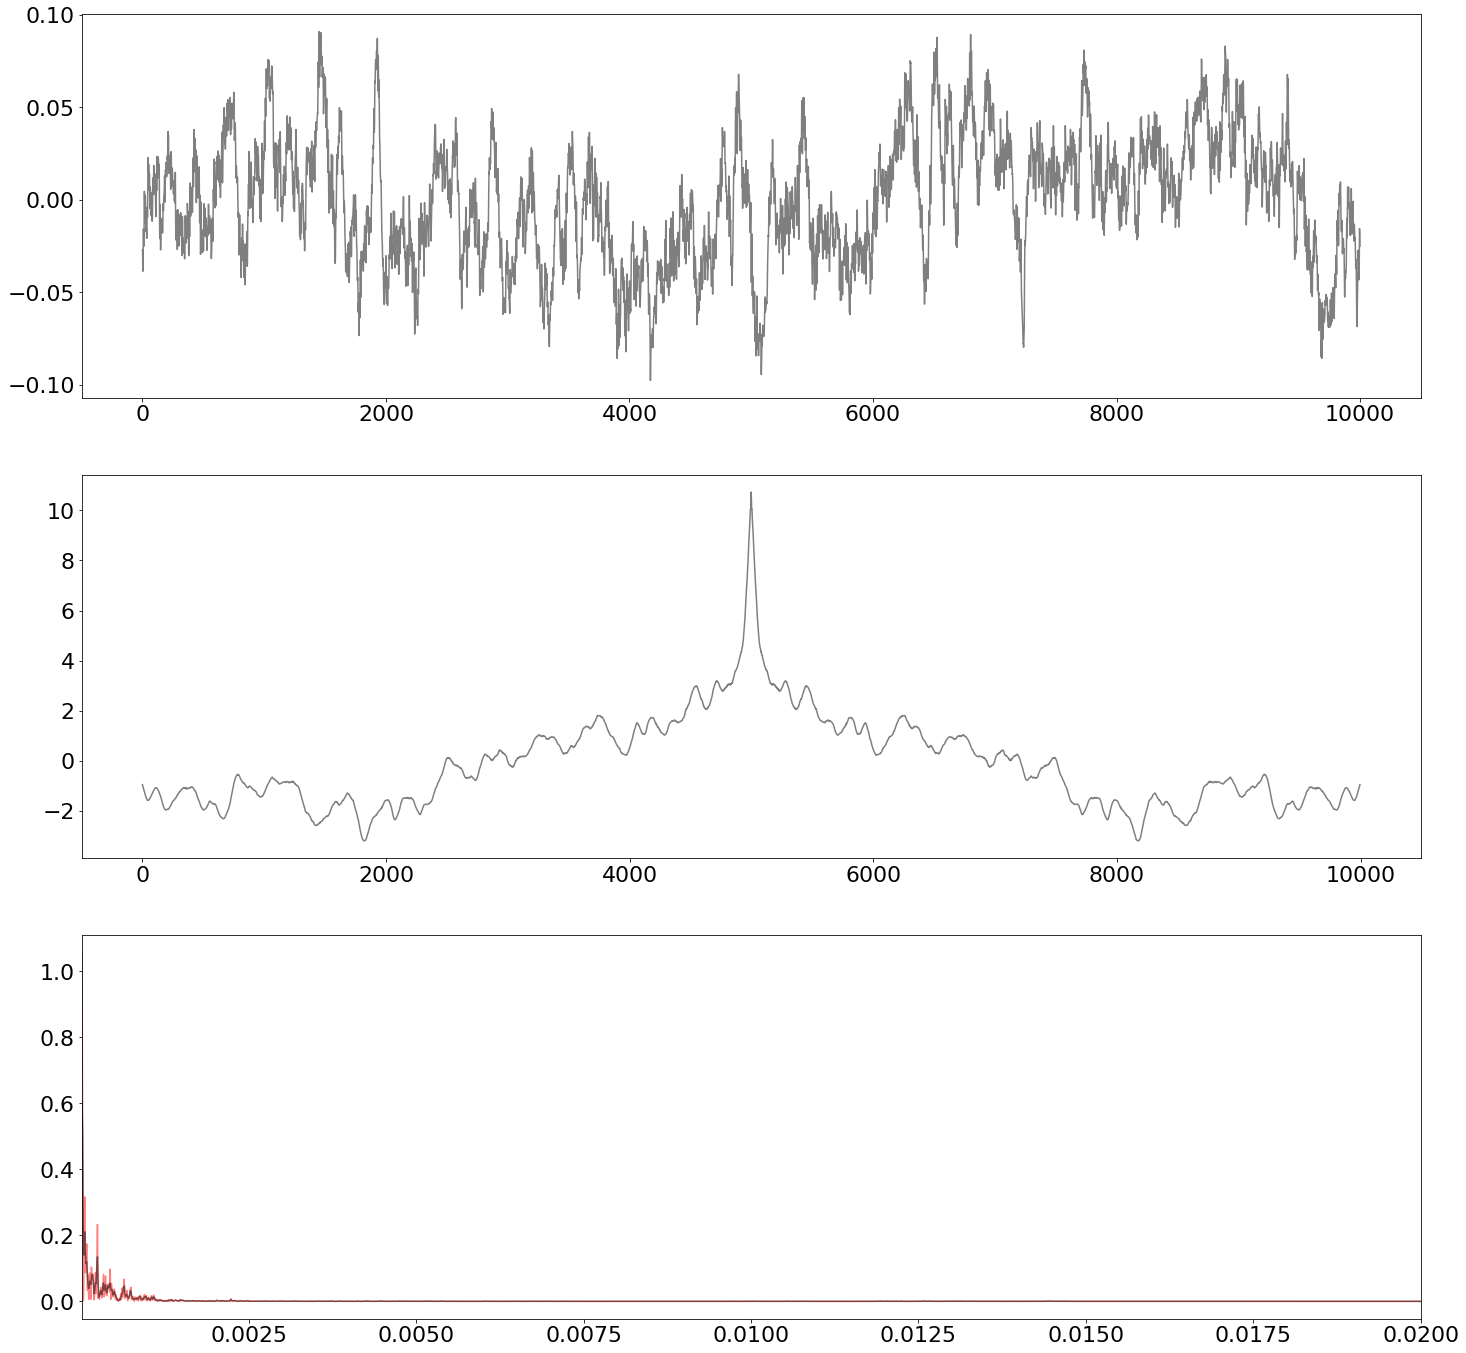

In [17]:
import scipy.signal.windows

def first_half(arr):
    return arr[1:len(arr)//2]

length = 100*1e3 #femtoseconds
dt = 10 #femtoseconds

run = f"{int(length/1e3)}ps_{dt}fs"

Mg_d = np.load(f"{run}_LHII_distances.npy")

print(Mg_d.shape)

fig, ax = plt.subplots(3,1)

for n, color in zip([1], ['red', 'blue', 'green']):
    for i in range(351):
        x = Mg_d[:,i] - np.mean(Mg_d[:,i])
        
        autocorr = analysis.autocorr(x)[5000:-5000]

        autocorr = first_half(autocorr)
        autocorr = np.concatenate((autocorr, autocorr[::-1]))
        
        print("first, last")
        print(autocorr[0])
        print(autocorr[-1])
        
        print("\n second, second last")
        print(autocorr[1])
        print(autocorr[-2])
        
        N = len(autocorr)
        
        window = scipy.signal.windows.hann(N, sym=False)
        
        windowed_autocorr = autocorr * window

        spectrum1 = scipy.fft.fft(autocorr) / N
        spectrum2 = scipy.fft.fft(windowed_autocorr) / N

        spectrum_normal_domain = np.fft.fftfreq(len(autocorr) * n, dt) 
        
        ax[0].plot(x, alpha=0.5, color='black')
        ax[1].plot(autocorr, alpha=0.5, color='black')
        ax[2].plot(first_half(spectrum_normal_domain), abs(first_half(spectrum1)), alpha=0.5, color='red')
        ax[2].plot(first_half(spectrum_normal_domain), abs(first_half(spectrum2)), alpha=0.5, color='black')
        
        break

        
ax[2].set_xlim(3e-6, 2e-2)
#ax[2].set_ylim(0, 0.002)

    
fig.set_size_inches(24,24)

(array([  1,  25,  51,  76, 120, 142, 180, 199, 231, 247, 273, 286, 306,
       316, 330, 337, 345, 349]),)


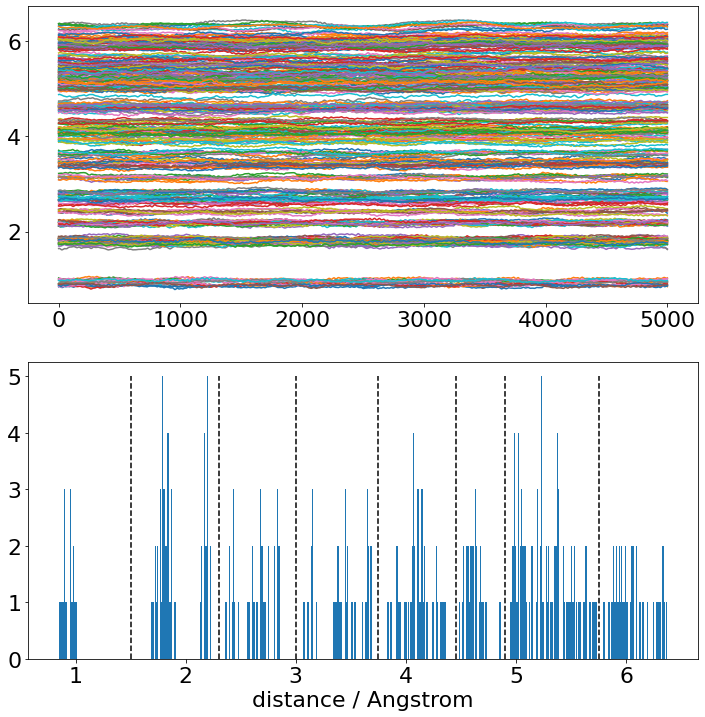

In [18]:
length = 10*1e3 #femtoseconds
dt = 2 #femtoseconds

run = f"{int(length/1e3)}ps_{dt}fs"

Mg_d = np.load(f"{run}_LHII_distances.npy")

Mg_d.shape

fig, ax = plt.subplots(2, 1, figsize=(12,12))

ax[0].plot(Mg_d);
ax[1].hist(np.average(Mg_d, axis=0), bins=500);

ax[1].vlines([1.5, 2.3, 3, 3.75, 4.45, 4.9, 5.75], color='black', ymin=0, ymax=5, linestyle="--")

ax[1].set_xlabel("distance / Angstrom")

print(np.where(np.average(Mg_d, axis=0) < 1.5))

In [19]:
spectra_1000ps, domain_1000ps = np.load('1000ps_100fs_LHII_spectra.npy'), np.load('1000ps_100fs_LHII_domain.npy')
spectra_100ps, domain_100ps = np.load('100ps_10fs_LHII_spectra.npy'), np.load('100ps_10fs_LHII_domain.npy')
spectra_10ps, domain_10ps = np.load('10ps_2fs_LHII_spectra.npy'), np.load('10ps_2fs_LHII_domain.npy')

In [20]:
spectra_100ps.shape

(351, 99995)

In [21]:
def value_select(upper, lower):
    select = np.where((np.average(Mg_d, axis=0) < upper) & (np.average(Mg_d, axis=0) > lower))
    
    return select[0]

distances = value_select(1.5, 0)

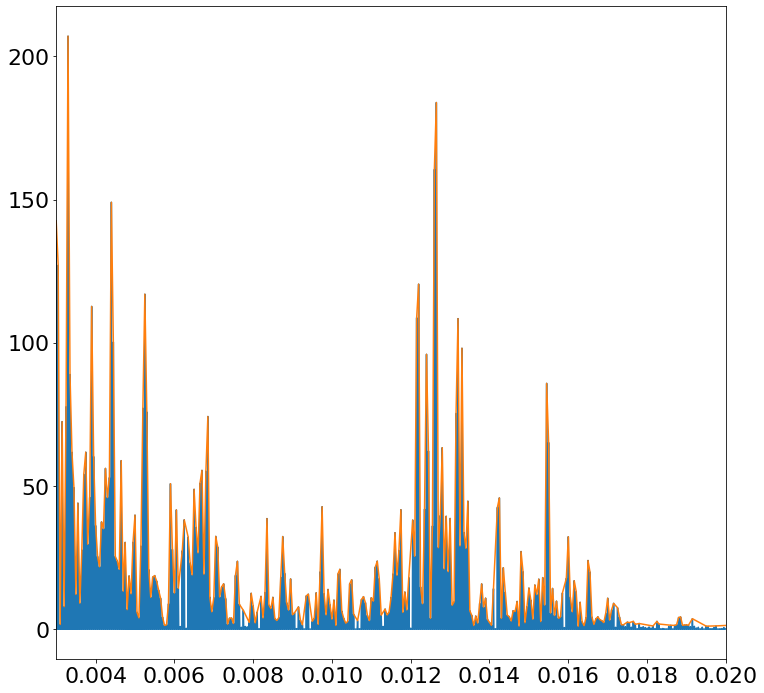

In [22]:
temp_domain = domain_10ps[np.where(domain_10ps > 3e-3)[0]]
temp_spectrum = abs(spectra_10ps[:,np.where(domain_10ps > 3e-3)[0]][0])

contributions = np.where(temp_spectrum > 1)[0]

fig, ax = plt.subplots()

ax.plot(temp_domain, temp_spectrum)
ax.set_xlim(3e-3, 2e-2)
ax.plot(temp_domain[contributions], temp_spectrum[contributions])

fig.set_size_inches(12,12)

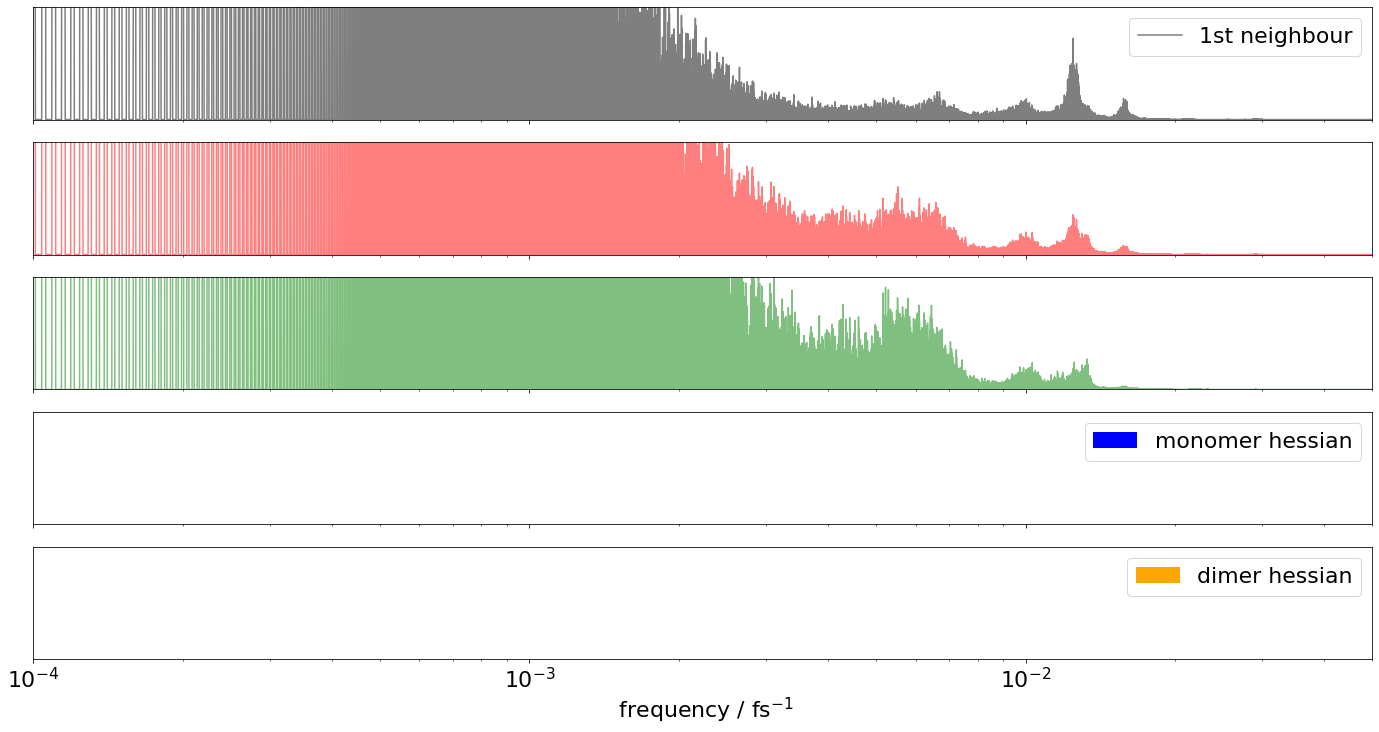

In [28]:
fig, ax = plt.subplots(5,1, sharex=True, sharey=True)

domain, spectrum = domain_100ps, spectra_100ps

domain_limit=1e-4
spectrum_limit=10

ax[0].set_xlim(domain_limit,0.05)
ax[0].set_ylim(0, 100)
ax[0].set_xscale("log")
alpha=0.5

mg_pairs = json.load(open("mg_pairs.json"))

# LHII spectra
limited_domain = domain[np.where(domain > domain_limit)[0]]
limited_spectrum = abs(spectrum[:,np.where(domain > domain_limit)[0]])

ax[0].plot(limited_domain, np.mean(limited_spectrum[mg_pairs["separation_1"]], axis=0), alpha=alpha, color='black', label="1st neighbour")
ax[1].plot(limited_domain, np.mean(limited_spectrum[mg_pairs["separation_5"]], axis=0), alpha=alpha, color='red', label="5th neighbour")
ax[2].plot(limited_domain, np.mean(limited_spectrum[mg_pairs["separation_9"]], axis=0), alpha=alpha, color='green', label="9th neighbour")

#hessians
    
#for m in glob.glob("../hessians/monomer_8*_hess_frequencies.npy"):
    #print(m)
    #monomer_hess_frequencies = np.load(m)
    #monomer_hess_displacements = np.load(m.replace("frequencies", "displacements"))

    #bar_width = np.mean([j-i for i, j in zip(monomer_hess_frequencies[1:], monomer_hess_frequencies[:-1])])/10
        
    #monomer_hess = ax[3].bar(monomer_hess_frequencies, 500 * monomer_hess_displacements, width=bar_width, color='blue')

#for d in glob.glob("../hessians/dimer_*_*_hess_frequencies.npy"):
    #print(d)
    #dimer_hess_frequencies = np.load(d)
    #dimer_hess_displacements = np.load(d.replace("frequencies", "displacements"))

    #bar_width = np.mean([j-i for i, j in zip(dimer_hess_frequencies[1:], dimer_hess_frequencies[:-1])])/10
        
    #dimer_hess = ax[4].bar(dimer_hess_frequencies, 500 * dimer_hess_displacements, width=bar_width, color='orange')

#gas phase MD
#monomer_MD_frequencies = np.load("../monomer_MD/monomer_MD_frequencies.npy")
#monomer_MD_spectrum = np.load("../monomer_MD/monomer_MD_spectrum.npy")

#dimer_MD_frequencies = np.load("../dimer_MD/dimer_MD_frequencies.npy")
#dimer_MD_spectrum = np.load("../dimer_MD/dimer_MD_spectrum.npy")

#monomer_MD, = ax[2].plot(monomer_MD_frequencies, 0.5 * monomer_MD_spectrum)
#dimer_MD, = ax[2].plot(dimer_MD_frequencies, 0.5 * dimer_MD_spectrum)


#plotting
ax[0].legend()
ax[0].legend()
ax[0].legend()
ax[3].legend([monomer_hess], ["monomer hessian"])
ax[4].legend([dimer_hess], ["dimer hessian"])


ax[4].set_xlabel(" frequency / fs$^{-1}$")

ax[0].set_yticks([])

fig.set_size_inches(24, 12)

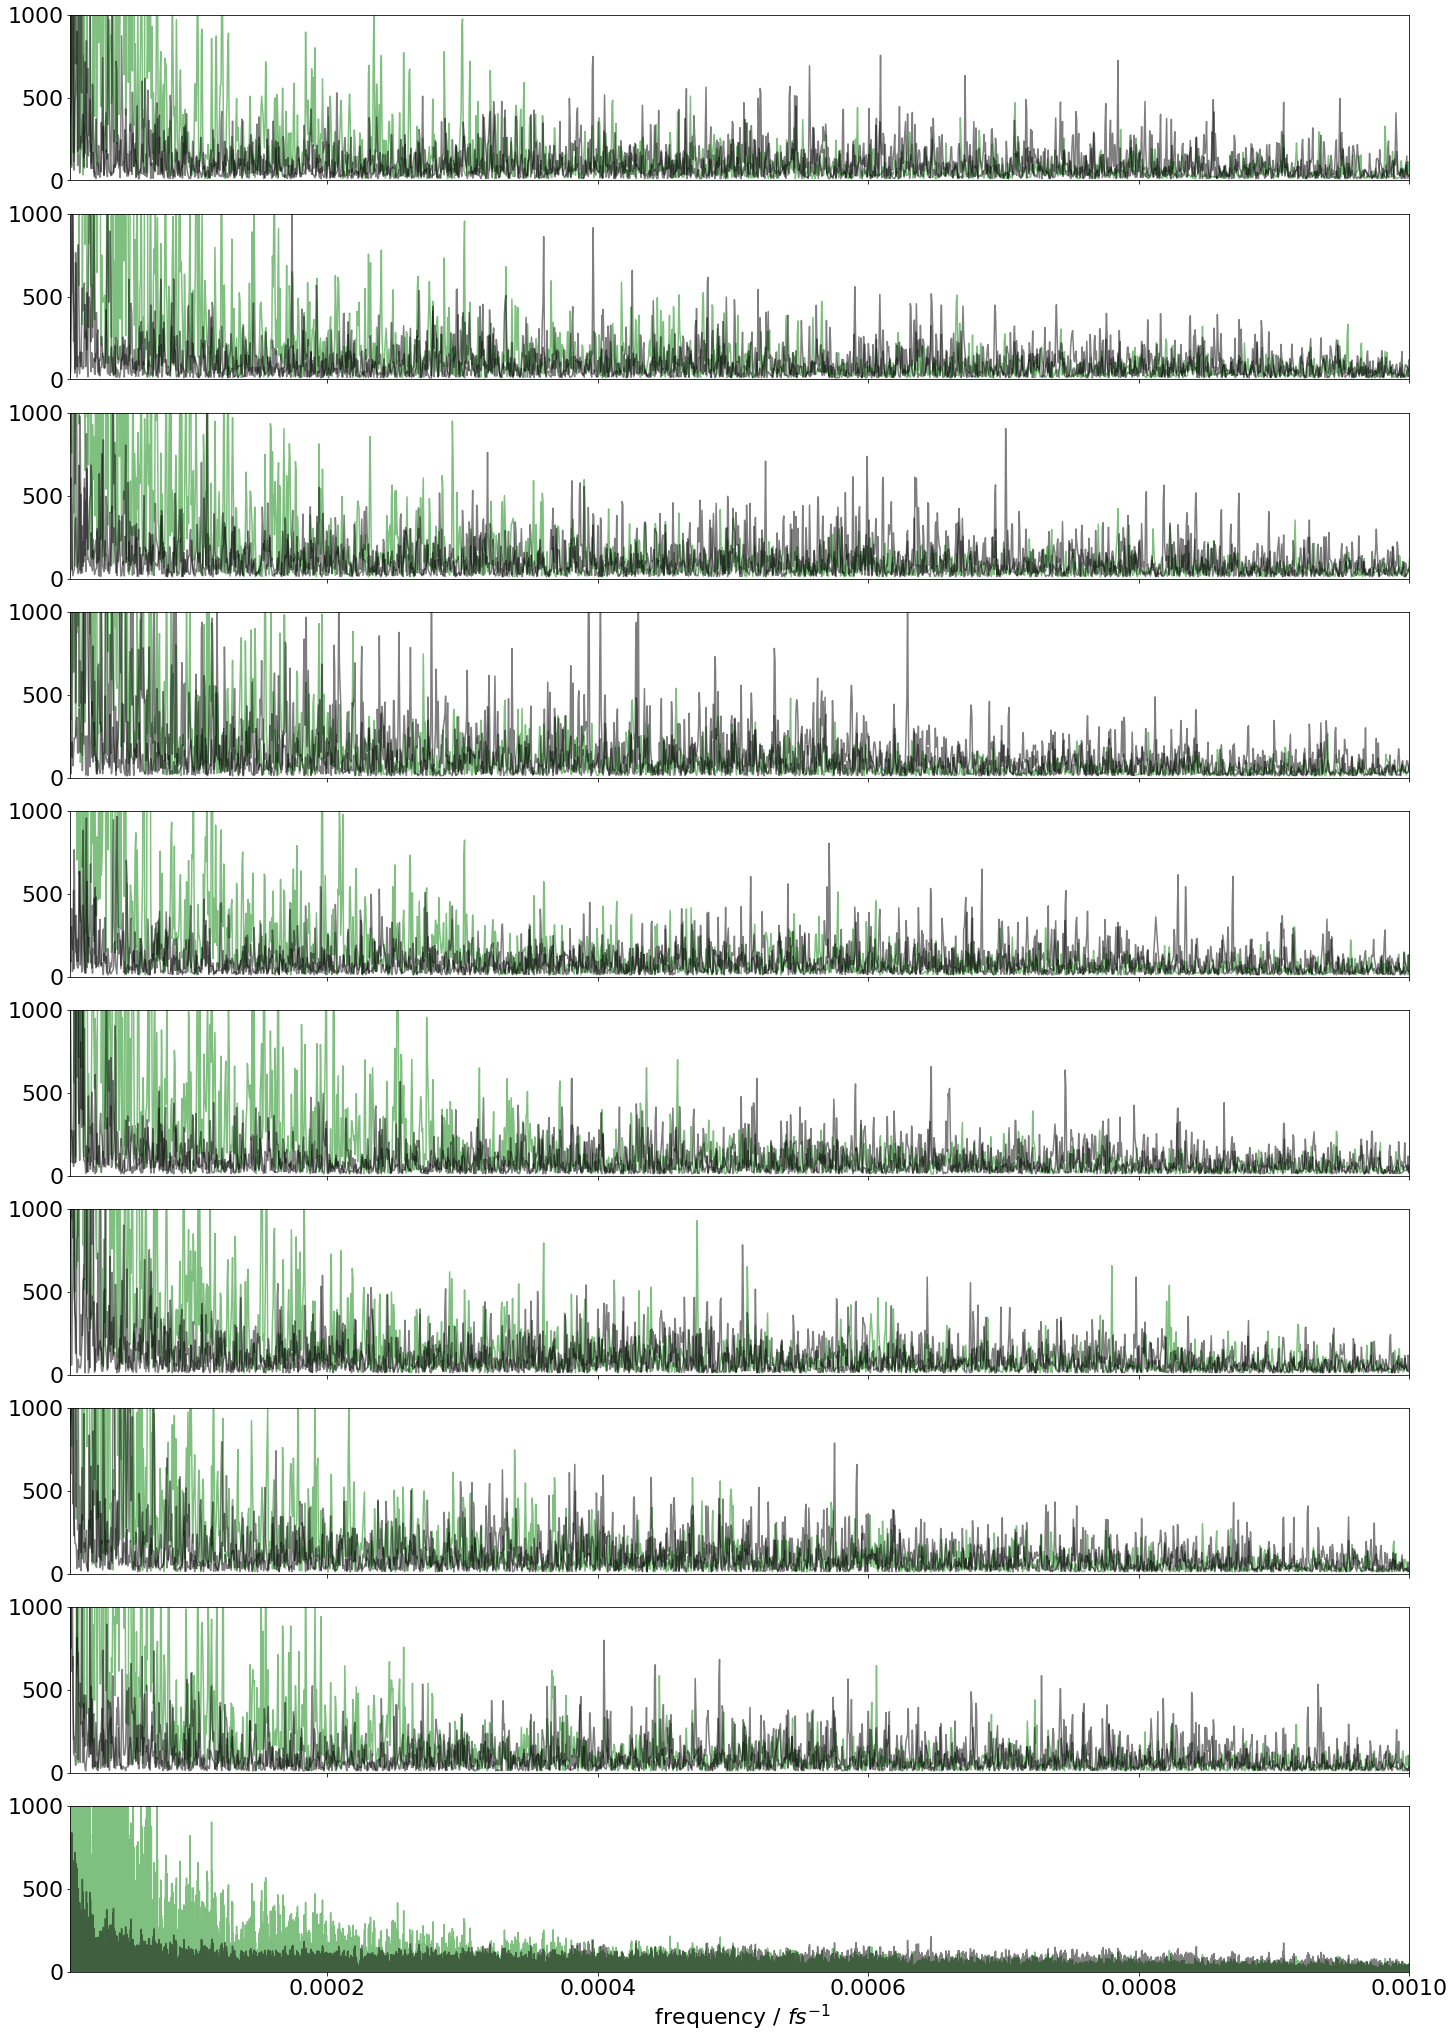

In [150]:
fig, ax = plt.subplots(10,1, sharex=True, sharey=True)

domain = domain_1000ps
spectrum = spectra_1000ps

domain_limit=1e-5
spectrum_limit=10

ax[0].set_xlim(domain_limit, 1e-3)
ax[0].set_ylim(0, 1000)

limited_domain = domain[np.where(domain > domain_limit)[0]]
limited_spectrum = abs(spectrum[:,np.where(domain > domain_limit)[0]])

for i in range(len(mg_pairs["separation_9"])):    
    contributions9 = np.where(limited_spectrum[mg_pairs["separation_9"][i]] > spectrum_limit)[0]
    contributions1a = np.where(limited_spectrum[mg_pairs["separation_1"][i]] > spectrum_limit)[0]
    contributions1b = np.where(limited_spectrum[mg_pairs["separation_1"][i+9]] > spectrum_limit)[0]

    ax[i].plot(limited_domain[contributions9], limited_spectrum[mg_pairs["separation_9"][i]][contributions9], alpha=alpha, color='green', label="9")
    ax[i].plot(limited_domain[contributions1a], limited_spectrum[mg_pairs["separation_1"][i]][contributions1a], alpha=alpha, color='black', label="9")
    ax[i].plot(limited_domain[contributions1b], limited_spectrum[mg_pairs["separation_1"][i+9]][contributions1b], alpha=alpha, color='black', label="9")

ax[9].plot(limited_domain, np.mean(limited_spectrum[mg_pairs["separation_9"]], axis=0), alpha=alpha, color='green', label="9")
ax[9].plot(limited_domain, np.mean(limited_spectrum[mg_pairs["separation_1"]], axis=0), alpha=alpha, color='black', label="9")

    
ax[9].set_xlabel(" frequency / $fs^{-1}$")

fig.set_size_inches(24, 36)

In [149]:
import pandas as pd

spectra_df_dict = {}

contributions = [enum for enum, x in enumerate(domain_100ps) if x > 1e-3 and x < 1e-2]

spectra_df_dict = {"Frequency" : domain_100ps[contributions]}

for sep_i in range(9):
    sep = mg_pairs[f"separation_{sep_i+1}"]
    for enum, i in enumerate(sep):
        spectra_df_dict[f"separation {sep_i+1} - {enum+1}"] = abs(spectra_100ps[i])[contributions]
                
spectra_df = pd.DataFrame.from_dict(spectra_df_dict)
spectra_df = spectra_df.set_index("Frequency")

arr = spectra_df.filter(like="separation 1").corr().to_numpy()
weights = (arr != 1.).astype(int)

np.average(arr, weights=weights)

0.5033311095951913

 MD length : 0.10 ns, timesteps :   1 fs, highest period : 200 ps, lowest period : 2.0 fs
 MD length : 0.10 ns, timesteps :  20 fs, highest period : 200 ps, lowest period : 40.0 fs
 MD length : 0.10 ns, timesteps :  50 fs, highest period : 200 ps, lowest period : 100.0 fs
 MD length : 0.10 ns, timesteps :  100 fs, highest period : 200 ps, lowest period : 200.0 fs
 MD length : 0.10 ns, timesteps :  200 fs, highest period : 200 ps, lowest period : 400.0 fs
 MD length : 0.10 ns, timesteps :  500 fs, highest period : 199 ps, lowest period : 1000.0 fs
 MD length : 0.10 ns, timesteps :  1000 fs, highest period : 198 ps, lowest period : 2000.0 fs
 MD length : 1.00 ns, timesteps :   1 fs, highest period : 2000 ps, lowest period : 2.0 fs
 MD length : 1.00 ns, timesteps :  20 fs, highest period : 2000 ps, lowest period : 40.0 fs
 MD length : 1.00 ns, timesteps :  50 fs, highest period : 2000 ps, lowest period : 100.0 fs
 MD length : 1.00 ns, timesteps :  100 fs, highest period : 2000 ps, lowest 

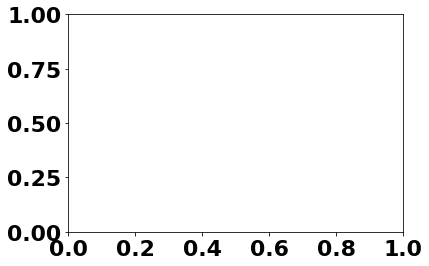

In [135]:
def resolution(length, timestep, cutoff=0):
    autocorr_length = 2 * (length - cutoff) - 2
        
    resolution = 1 / (timestep * autocorr_length)
    
    return resolution


def highest_frequency(timestep):
    return 1/(2*timestep)


fig, ax = plt.subplots()

MD_ns_lengths = [0.1, 1, 10, 100] # ns

timesteps = [1, 20, 50, 100, 200, 500, 1000] # fsbf

max_freqs = [highest_frequency(x) for x in timesteps]

res_mat = np.zeros((len(MD_ns_lengths), len(timesteps)))

for i, ns in enumerate(MD_ns_lengths):
    for j, dt in enumerate(timesteps):

        n_steps = 1e6 * ns / dt

        res, max_freq = resolution(n_steps, dt), highest_frequency(dt)
        
        print(f" MD length : {ns:2.2f} ns, timesteps : {dt : 3.0f} fs, highest period : {1e-3/res:3.0f} ps, lowest period : {1/max_freq} fs") 

In [ ]:
full_rmsd = mdtraj.rmsd(traj, traj, 0)
BCL_rmsd = mdtraj.rmsd(traj, traj, 0, atom_indices = BCL_atom_indices)

In [16]:
log = pd.read_csv("LH2_files/output/log.txt", sep="\t")
log["RMSD"] = full_rmsd
log["BCL RMSD"] = BCL_rmsd

ValueError: Length of values (2624) does not match length of index (4000)

In [13]:
log

,"#""Progress (%)""",Step,Potential Energy (kJ/mole),Temperature (K),Speed (ns/day)
0,0.0%,10,-2.868276e+06,300.578177,0.000
1,0.1%,20,-2.867977e+06,300.712337,0.483
2,0.1%,30,-2.868144e+06,300.805135,0.431
3,0.1%,40,-2.868425e+06,300.676495,0.444
4,0.1%,50,-2.868008e+06,300.446538,0.443
...,...,...,...,...,...
3995,99.9%,39960,-2.869814e+06,300.520701,0.448
3996,99.9%,39970,-2.870865e+06,300.675209,0.448
3997,100.0%,39980,-2.868822e+06,299.869208,0.448
3998,100.0%,39990,-2.868310e+06,299.991418,0.448


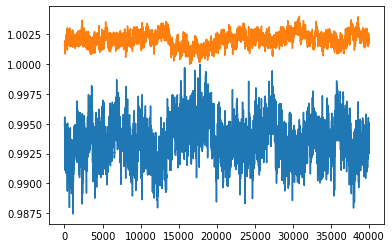

In [14]:
fig, ax = plt.subplots()

ax.plot(log.Step, log["Temperature (K)"]/max(log["Temperature (K)"]))
ax.plot(log.Step, log["Potential Energy (kJ/mole)"]/max(log["Potential Energy (kJ/mole)"]))

KeyError: 'RMSD'

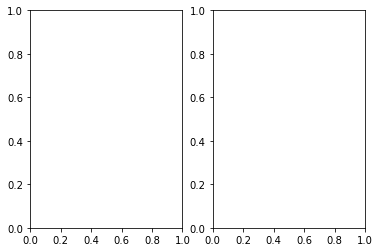

In [15]:
fig, ax = plt.subplots(1, 2)

log.plot("Step", "RMSD", ax=ax[0])
log.plot("Step", "BCL RMSD", ax=ax[1])

fig.set_size_inches(24, 12)